c:\Users\Mark\anaconda3\envs\ModifiedCALenv\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


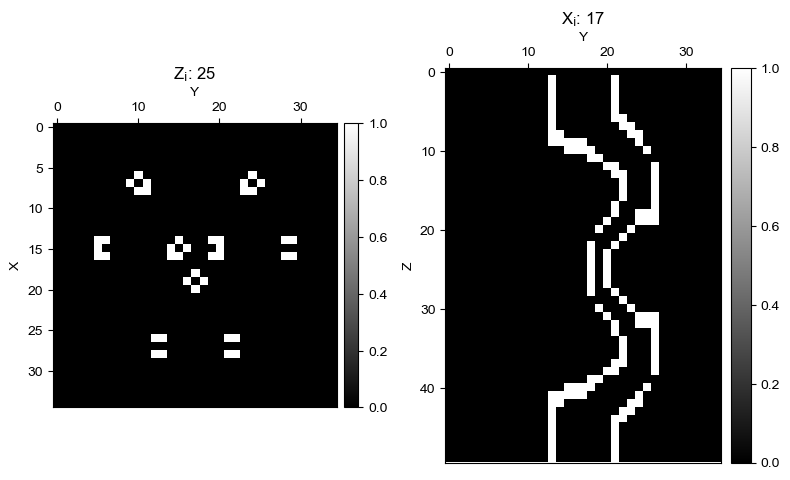

In [1]:
import vamtoolbox as vam
import numpy as np

targetgeo = vam.geometry.TargetGeometry(stlfilename=vam.resources.load("trifurcatedvasculature.stl"), resolution = 50)
targetgeo.show()

In [2]:
num_angles = 360

angles = np.linspace(0, 360 - 360/num_angles, num_angles)

proj_geo = vam.geometry.ProjectionGeometry(angles, ray_type='parallel', CUDA=True)


183020
(35, 360, 50)
(50, 35)


c:\Users\Mark\anaconda3\envs\ModifiedCALenv\lib\site-packages\vamtoolbox\util\data.py:116: ComplexWarning: Casting complex values to real discards the imaginary part
  return x_filtered.astype(float)


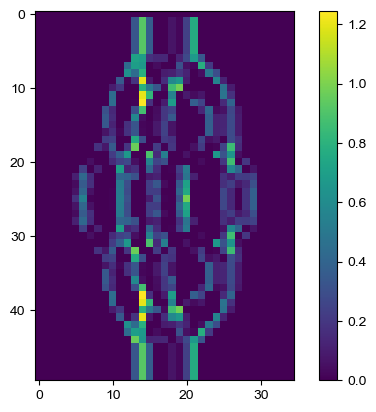

In [12]:
import matplotlib.pyplot as plt
optimizer_params = vam.optimize.Options(method='OSMO', n_iter=20, d_h = 0.85, d_l = 0.6, filter='hamming', verbose='plot')
b = vam.optimize.returnPreOptimize(targetgeo, proj_geo, optimizer_params)
print(np.count_nonzero(b))
print(b.shape)

slice_2d = b[:, 100, :].T  # Selecting the first 100 rows from the second dimension
print(slice_2d.shape)
plt.imshow(slice_2d)
plt.colorbar()  # Optional: Add a colorbar to the plot
plt.show()

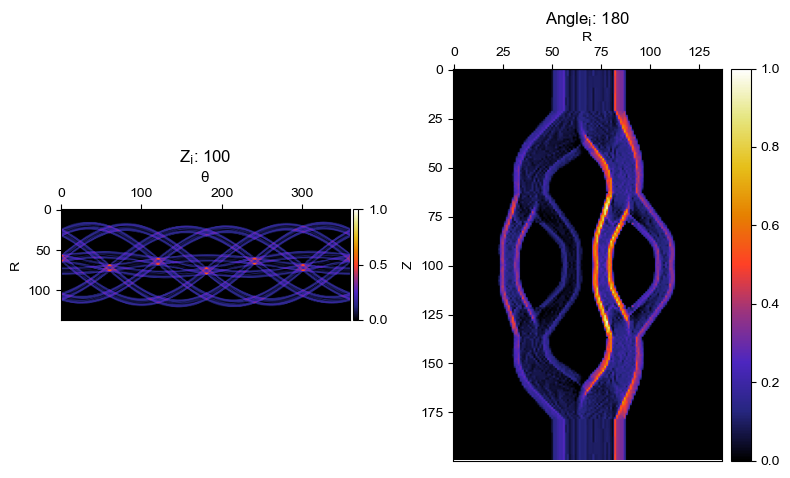

In [4]:
opt_sino.show()

In [13]:

opt_recon.show()

NameError: name 'method' is not defined

In [6]:
import vedo
import vedo.applications

vol = vedo.Volume(opt_recon.array, mode=0)
vedo.applications.RayCastPlotter(vol, bg='black').show(viewup="x")